In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sms-spam-collection-dataset/spam.csv


In [2]:
df=pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv',encoding='latin-1') #read the sms spam collection dataset

In [3]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
#lets first drop the unknown columns
df=df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [5]:
df=df.rename({'v1':'target',
             'v2':'text'},axis=1) #rename the first column as tsrget(ham/spam) and second column as text

In [6]:
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
#lets make another column i.e the length of the text
len_text=[]
for i in df['text']:
    len_text.append(len(i))

In [8]:
df['text_length']=len_text #add a another column as text_length

In [9]:
df

,target,text,text_length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161
5568,ham,Will Ì_ b going to esplanade fr home?,37
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


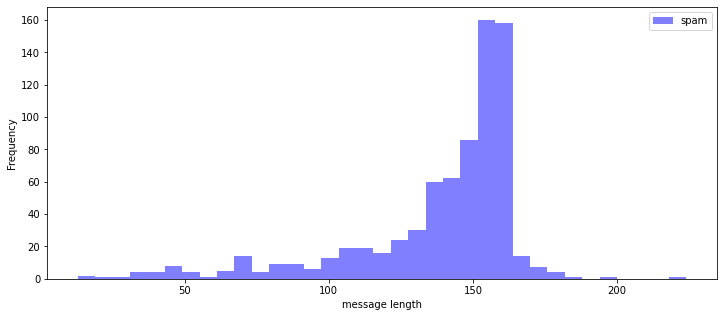

In [10]:
import matplotlib.pyplot as plt          #plot the graph of spam massege length vs frequency of that length of messages received
plt.figure(figsize=(12,5))
df[df['target']=='spam']['text_length'].plot(bins=35,kind='hist',color='blue',label='spam',alpha=0.5)
plt.legend()
plt.xlabel('message length')
plt.show()

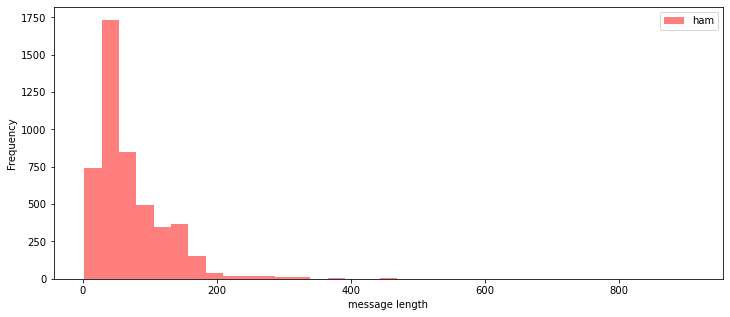

In [11]:
plt.figure(figsize=(12,5))        ##plot the graph of ham massege length vs frequency of that length of messages received
df[df['target']=='ham']['text_length'].plot(bins=35,kind='hist',color='red',label='ham',alpha=0.5)
plt.legend()
plt.xlabel('message length')
plt.show()

In [12]:
#from the above two histograms we can conclude that spam messages are mostly of length bw 150-200
#and ham messages are of shorter length

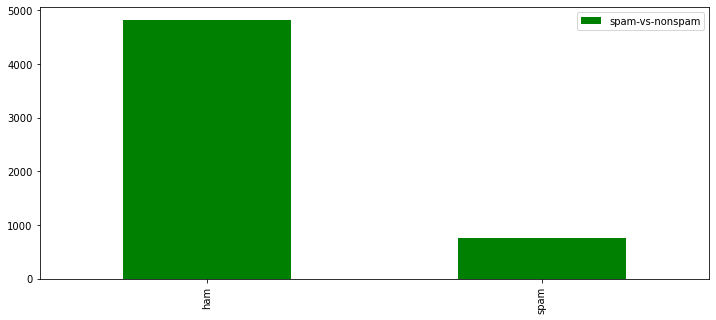

In [13]:
plt.figure(figsize=(12,5)) # plot a bar chart of number of spam messages and non spam messages
df['target'].value_counts().plot(kind='bar',color='green',label='spam-vs-nonspam')
plt.legend()
plt.show()

In [14]:
#from this figure we can conclude that ham messages are more than spam messages

In [15]:
import nltk 
from nltk.tokenize import word_tokenize #used to split words in a sentence
from nltk.corpus import stopwords #used to removing the stopwords

In [16]:
df['target']=np.where(df['target']=='spam',1,0) #binary value assign(when target = spam the value is 1 and otherwise(ham) the value equals 0)

In [17]:
spam=[] #define an array for spam
ham=[]  #define an array for ham
spam_class=df[df['target']==1]['text'] #all spam messages are goes to spam_class
ham_class=df[df['target']==0]['text']  #all ham messages are goes to ham_class

In [18]:
#extract the each text which included to ham class. Then split text to words and get words 1 by 1 and make all word in lowercase and remove the stopwords. Then makesure all characters in the string are alphabets.
def extract_ham(ham_class): 
    global ham
    words = [word.lower() for word in word_tokenize(ham_class) if word.lower() not in stopwords.words("english") and word.lower().isalpha()]
    ham=ham+words

In [19]:
#extract the each text which included to spam class. Then split text to words and get words 1 by 1 and make all word in lowercase and remove the stopwords. Then makesure all characters in the string are alphabets.
def extract_spam(spam_class):
    global spam
    words = [word.lower() for word in word_tokenize(spam_class) if word.lower() not in stopwords.words("english") and word.lower().isalpha()]
    spam=spam+words

In [20]:
ham_class.apply(extract_ham ) #ham texts

0       None
1       None
3       None
4       None
6       None
        ... 
5565    None
5568    None
5569    None
5570    None
5571    None
Name: text, Length: 4825, dtype: object

In [21]:
len(ham)

36460

In [22]:
spam_class.apply(extract_spam ) #spam texts

2       None
5       None
8       None
9       None
11      None
        ... 
5537    None
5540    None
5547    None
5566    None
5567    None
Name: text, Length: 747, dtype: object

In [23]:
len(spam)

9383

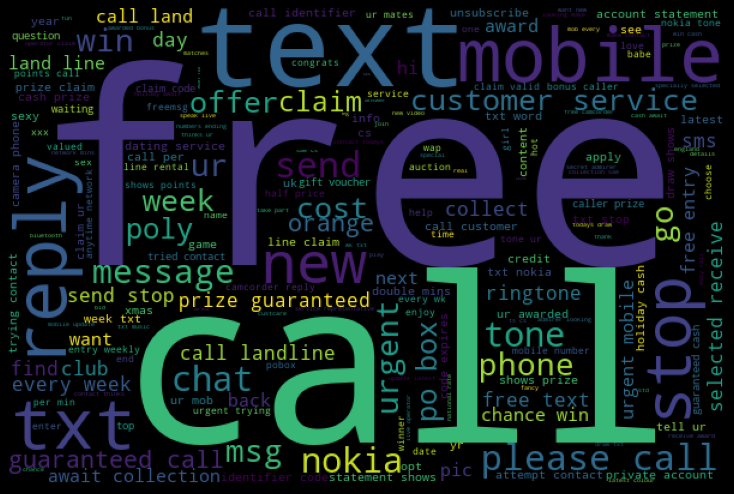

In [24]:
#A word cloud is an image made of words that together resemble a cloudy shape.The size of a word shows how important it is e.g. how often it appears in a text — its frequency.
from wordcloud import WordCloud   #Make a word cloud with words which are included to spam class
spam_wordcloud = WordCloud(width=600, height=400).generate(" ".join(spam))
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

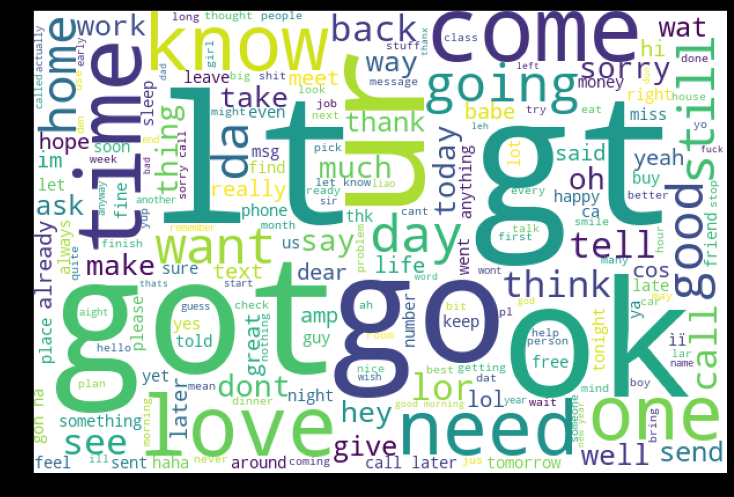

In [25]:
ham_cloud=WordCloud(width=600,height=400,background_color='white').generate(" ".join(ham))#Make a word cloud with words which are included to ham class
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(ham_cloud)
plt.tight_layout(pad=0)
plt.show()

In [26]:
#top 10 spam words=
spam_words=np.array(spam)
pd.Series(spam_words).value_counts().head(n=10)

call      346
free      217
txt       156
u         144
ur        144
mobile    123
text      121
stop      114
claim     113
reply     104
dtype: int64

In [27]:
#top 10 ham words
ham_words=np.array(ham)
pd.Series(ham_words).value_counts().head(n=10)

u       974
gt      318
lt      316
get     301
go      246
ok      246
got     242
ur      237
know    234
like    231
dtype: int64

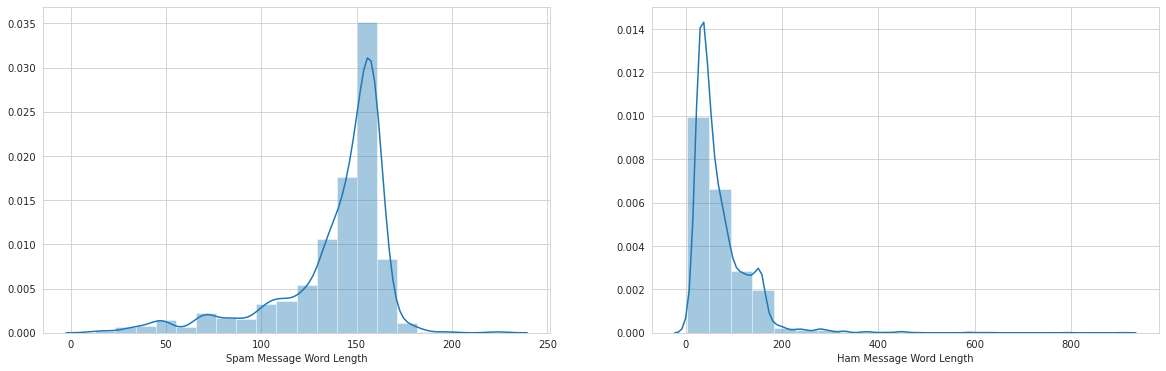

In [28]:
import seaborn as sns #plot the graphs for distribution of text length vs probability of that length used
sns.set_style('whitegrid')

f, ax = plt.subplots(1, 2, figsize = (20, 6))

sns.distplot(df[df["target"] == 1]["text_length"], bins = 20, ax = ax[0])#for spam masseges
ax[0].set_xlabel("Spam Message Word Length")

sns.distplot(df[df["target"] == 0]["text_length"], bins = 20, ax = ax[1])#for ham masseges
ax[1].set_xlabel("Ham Message Word Length")

plt.show()

In [29]:
#now  we are done with visualizations task,next move into text ceaning

In [30]:
from nltk.stem import SnowballStemmer
import string
stemmer = SnowballStemmer("english")

def cleanText(message):# define a function name cleanText
    
    message = message.translate(str.maketrans('', '', string.punctuation)) #remove all the punctuation marks
    words = [stemmer.stem(word) for word in message.split() if word.lower() not in stopwords.words("english")]#Split the words, stemmer removes morphological affexes from words
    
    return " ".join(words)# then join the all words and return the sentence

df["text"] = df["text"].apply(cleanText)
df.head(n = 20)    #print here first 20 text after using above pre-processing steps.

,target,text,text_length
0,0,go jurong point crazi avail bugi n great world...,111
1,0,ok lar joke wif u oni,29
2,1,free entri 2 wkli comp win fa cup final tkts 2...,155
3,0,u dun say earli hor u c alreadi say,49
4,0,nah dont think goe usf live around though,61
5,1,freemsg hey darl 3 week word back id like fun ...,148
6,0,even brother like speak treat like aid patent,77
7,0,per request mell mell oru minnaminungint nurun...,160
8,1,winner valu network custom select receivea å£9...,158
9,1,mobil 11 month u r entitl updat latest colour ...,154


In [31]:
y=df['target']#target is get as the dependent variable
x=df['text']#text is get as the independent variable

In [32]:
from sklearn.model_selection import train_test_split #split the data set to traing and testing data
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)#20% testing data

In [33]:
from sklearn.linear_model import LogisticRegression #used logistic regression algorithm
from sklearn.feature_extraction.text import CountVectorizer #feature extraction
from sklearn.metrics import accuracy_score 
cv=CountVectorizer()
lr=LogisticRegression(max_iter=10000)#The iteration value 10000 which gives maximum iteration value as 97.7578%
x_train=cv.fit_transform(x_train)

In [34]:
lr.fit(x_train,y_train)
pred_1=lr.predict(cv.transform(x_test))#pedict the test dataset
score_1=accuracy_score(y_test,pred_1)
score_1

0.9775784753363229

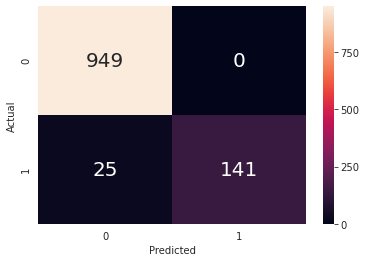

In [35]:
data = {'y_Actual': y_test,
        'y_Predicted': pred_1
        }

df_confusion_max = pd.DataFrame(data, columns=['y_Actual', 'y_Predicted'])
confusion_matrix = pd.crosstab(df_confusion_max['y_Actual'], df_confusion_max['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True, fmt='d',annot_kws={"fontsize":20})       # fmt='.2%'     fmt="d"
sns.set(font_scale=2)
plt.show()

In [36]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

y_true = np.reshape(y_test, [1115])
y_pred = np.reshape(pred_1, [1115])

# Confusion Matrix
print('Confusion Matrix', confusion_matrix(y_true, y_pred))
TN, FP, FN, TP = confusion_matrix(y_true, y_pred).ravel()
print(TN, FP, FN, TP)
print("=======================================")
# Accuracy
print('Accuracy:', accuracy_score(y_true, y_pred))
print("=======================================")
# Recall
print('Recall:', recall_score(y_true, y_pred, average=None))
print("=======================================")
# Precision
print('Precision', precision_score(y_true, y_pred, average=None))
print("=======================================")
# F1 Score
print('F1 Score:', f1_score(y_true, y_pred, average=None))
print("=======================================")
# classification report
print(classification_report(y_true, y_pred, target_names=['0', '1']))


# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print("Sensitivity=",TPR)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
print("Specificity",TNR)
# Precision or positive predictive value
PPV = TP/(TP+FP)
print("Precision or positive predictive value=",PPV)
# Negative predictive value
NPV = TN/(TN+FN)
print("Negative predictive value=",NPV)
# Fall out or false positive rate
FPR = FP/(FP+TN)
print("Fall out or false positive rate",FPR)
# False negative rate
FNR = FN/(TP+FN)
print("False negative rate",FNR)
# False discovery rate
FDR = FP/(TP+FP)
print("False discovery rate",FDR)


Confusion Matrix [[949   0]
 [ 25 141]]
949 0 25 141
Accuracy: 0.9775784753363229
Recall: [1.         0.84939759]
Precision [0.97433265 1.        ]
F1 Score: [0.98699948 0.91856678]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       949
           1       1.00      0.85      0.92       166

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115

Sensitivity= 0.8493975903614458
Specificity 1.0
Precision or positive predictive value= 1.0
Negative predictive value= 0.9743326488706365
Fall out or false positive rate 0.0
False negative rate 0.15060240963855423
False discovery rate 0.0


In [37]:
from sklearn.naive_bayes import MultinomialNB #using naive bayes algorithm
nb=MultinomialNB()
nb.fit(x_train,y_train)
pred_2=nb.predict(cv.transform(x_test))
score_2=accuracy_score(y_test,pred_2)
score_2

0.9820627802690582

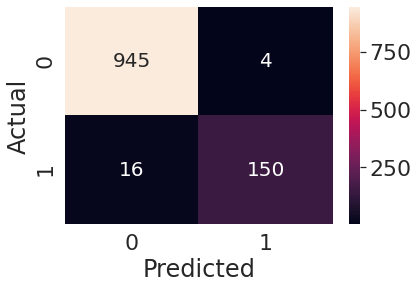

In [38]:
data = {'y_Actual': y_test,
        'y_Predicted': pred_2
        }

df_confusion_max = pd.DataFrame(data, columns=['y_Actual', 'y_Predicted'])
confusion_matrix = pd.crosstab(df_confusion_max['y_Actual'], df_confusion_max['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True, fmt='d',annot_kws={"fontsize":20})       # fmt='.2%'     fmt="d"
# sns.set(font_scale=2)
plt.show()

In [39]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

y_true = np.reshape(y_test, [1115])
y_pred = np.reshape(pred_2, [1115])

# Confusion Matrix
print('Confusion Matrix', confusion_matrix(y_true, y_pred))
TN, FP, FN, TP = confusion_matrix(y_true, y_pred).ravel()
print(TN, FP, FN, TP)
print("=======================================")
# Accuracy
print('Accuracy:', accuracy_score(y_true, y_pred))
print("=======================================")
# Recall
print('Recall:', recall_score(y_true, y_pred, average=None))
print("=======================================")
# Precision
print('Precision', precision_score(y_true, y_pred, average=None))
print("=======================================")
# F1 Score
print('F1 Score:', f1_score(y_true, y_pred, average=None))
print("=======================================")
# classification report
print(classification_report(y_true, y_pred, target_names=['0', '1']))


# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print("Sensitivity=",TPR)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
print("Specificity",TNR)
# Precision or positive predictive value
PPV = TP/(TP+FP)
print("Precision or positive predictive value=",PPV)
# Negative predictive value
NPV = TN/(TN+FN)
print("Negative predictive value=",NPV)
# Fall out or false positive rate
FPR = FP/(FP+TN)
print("Fall out or false positive rate",FPR)
# False negative rate
FNR = FN/(TP+FN)
print("False negative rate",FNR)
# False discovery rate
FDR = FP/(TP+FP)
print("False discovery rate",FDR)

Confusion Matrix [[945   4]
 [ 16 150]]
945 4 16 150
Accuracy: 0.9820627802690582
Recall: [0.99578504 0.90361446]
Precision [0.98335068 0.97402597]
F1 Score: [0.9895288 0.9375   ]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       949
           1       0.97      0.90      0.94       166

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115

Sensitivity= 0.9036144578313253
Specificity 0.9957850368809273
Precision or positive predictive value= 0.974025974025974
Negative predictive value= 0.9833506763787722
Fall out or false positive rate 0.004214963119072708
False negative rate 0.0963855421686747
False discovery rate 0.025974025974025976


In [40]:
from sklearn.svm import SVC #used the Support Vector Machine algorithm
svm=SVC()
svm.fit(x_train,y_train)
pred_3=svm.predict(cv.transform(x_test))
score_3=accuracy_score(y_test,pred_3)
score_3

0.9730941704035875

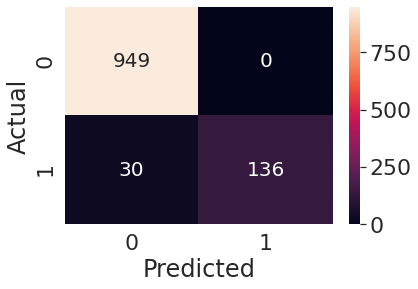

In [41]:
data = {'y_Actual': y_test,
        'y_Predicted': pred_3
        }

df_confusion_max = pd.DataFrame(data, columns=['y_Actual', 'y_Predicted'])
confusion_matrix = pd.crosstab(df_confusion_max['y_Actual'], df_confusion_max['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True, fmt='d',annot_kws={"fontsize":20})       # fmt='.2%'     fmt="d"
# sns.set(font_scale=3)
plt.show()

In [42]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

y_true = np.reshape(y_test, [1115])
y_pred = np.reshape(pred_3, [1115])

# Confusion Matrix
print('Confusion Matrix', confusion_matrix(y_true, y_pred))
TN, FP, FN, TP = confusion_matrix(y_true, y_pred).ravel()
print(TN, FP, FN, TP)
print("=======================================")
# Accuracy
print('Accuracy:', accuracy_score(y_true, y_pred))
print("=======================================")
# Recall
print('Recall:', recall_score(y_true, y_pred, average=None))
print("=======================================")
# Precision
print('Precision', precision_score(y_true, y_pred, average=None))
print("=======================================")
# F1 Score
print('F1 Score:', f1_score(y_true, y_pred, average=None))
print("=======================================")
# classification report
print(classification_report(y_true, y_pred, target_names=['0', '1']))


# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print("Sensitivity=",TPR)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
print("Specificity",TNR)
# Precision or positive predictive value
PPV = TP/(TP+FP)
print("Precision or positive predictive value=",PPV)
# Negative predictive value
NPV = TN/(TN+FN)
print("Negative predictive value=",NPV)
# Fall out or false positive rate
FPR = FP/(FP+TN)
print("Fall out or false positive rate",FPR)
# False negative rate
FNR = FN/(TP+FN)
print("False negative rate",FNR)
# False discovery rate
FDR = FP/(TP+FP)
print("False discovery rate",FDR)

Confusion Matrix [[949   0]
 [ 30 136]]
949 0 30 136
Accuracy: 0.9730941704035875
Recall: [1.         0.81927711]
Precision [0.96935649 1.        ]
F1 Score: [0.98443983 0.90066225]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       949
           1       1.00      0.82      0.90       166

    accuracy                           0.97      1115
   macro avg       0.98      0.91      0.94      1115
weighted avg       0.97      0.97      0.97      1115

Sensitivity= 0.8192771084337349
Specificity 1.0
Precision or positive predictive value= 1.0
Negative predictive value= 0.9693564862104188
Fall out or false positive rate 0.0
False negative rate 0.18072289156626506
False discovery rate 0.0


In [43]:
from sklearn.tree import DecisionTreeClassifier#Using desitionTreeClassifier
clc = DecisionTreeClassifier(max_depth=200)
clc = clc.fit(x_train,y_train)
pred_4=clc.predict(cv.transform(x_test))
score_4=accuracy_score(y_test,pred_4)
score_4


0.957847533632287

[Text(298.751481042654, 215.7673846153846, 'X[1525] <= 0.5\ngini = 0.227\nsamples = 4457\nvalue = [3876, 581]'),
 Text(273.81007109004736, 212.42215384615383, 'X[6320] <= 0.5\ngini = 0.153\nsamples = 3988\nvalue = [3654, 334]'),
 Text(254.07511848341233, 209.07692307692307, 'X[5148] <= 0.5\ngini = 0.11\nsamples = 3870\nvalue = [3643, 227]'),
 Text(233.64597156398105, 205.7316923076923, 'X[6036] <= 0.5\ngini = 0.09\nsamples = 3790\nvalue = [3612, 178]'),
 Text(218.17535545023696, 202.38646153846153, 'X[559] <= 0.5\ngini = 0.07\nsamples = 3691\nvalue = [3557, 134]'),
 Text(215.00189573459716, 199.04123076923076, 'X[326] <= 0.5\ngini = 0.064\nsamples = 3679\nvalue = [3557, 122]'),
 Text(211.82843601895735, 195.696, 'X[4134] <= 0.5\ngini = 0.059\nsamples = 3669\nvalue = [3557, 112]'),
 Text(199.92796208530805, 192.35076923076923, 'X[6432] <= 0.5\ngini = 0.054\nsamples = 3652\nvalue = [3551, 101]'),
 Text(191.99431279620853, 189.00553846153846, 'X[4372] <= 0.5\ngini = 0.05\nsamples = 3644\n

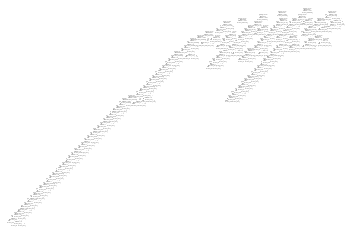

In [44]:
from sklearn import tree
tree.plot_tree(clc)

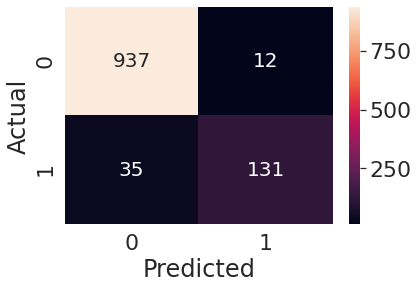

In [45]:
data = {'y_Actual': y_test,
        'y_Predicted': pred_4
        }

df_confusion_max = pd.DataFrame(data, columns=['y_Actual', 'y_Predicted'])
confusion_matrix = pd.crosstab(df_confusion_max['y_Actual'], df_confusion_max['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True, fmt='d',annot_kws={"fontsize":20})       # fmt='.2%'     fmt="d"
# sns.set(font_scale=3)
plt.show()

In [46]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

y_true = np.reshape(y_test, [1115])
y_pred = np.reshape(pred_4, [1115])

# Confusion Matrix
print('Confusion Matrix', confusion_matrix(y_true, y_pred))
TN, FP, FN, TP = confusion_matrix(y_true, y_pred).ravel()
print(TN, FP, FN, TP)
print("=======================================")
# Accuracy
print('Accuracy:', accuracy_score(y_true, y_pred))
print("=======================================")
# Recall
print('Recall:', recall_score(y_true, y_pred, average=None))
print("=======================================")
# Precision
print('Precision', precision_score(y_true, y_pred, average=None))
print("=======================================")
# F1 Score
print('F1 Score:', f1_score(y_true, y_pred, average=None))
print("=======================================")
# classification report
print(classification_report(y_true, y_pred, target_names=['0', '1']))


# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print("Sensitivity=",TPR)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
print("Specificity",TNR)
# Precision or positive predictive value
PPV = TP/(TP+FP)
print("Precision or positive predictive value=",PPV)
# Negative predictive value
NPV = TN/(TN+FN)
print("Negative predictive value=",NPV)
# Fall out or false positive rate
FPR = FP/(FP+TN)
print("Fall out or false positive rate",FPR)
# False negative rate
FNR = FN/(TP+FN)
print("False negative rate",FNR)
# False discovery rate
FDR = FP/(TP+FP)
print("False discovery rate",FDR)

Confusion Matrix [[937  12]
 [ 35 131]]
937 12 35 131
Accuracy: 0.957847533632287
Recall: [0.98735511 0.78915663]
Precision [0.96399177 0.91608392]
F1 Score: [0.97553358 0.84789644]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       949
           1       0.92      0.79      0.85       166

    accuracy                           0.96      1115
   macro avg       0.94      0.89      0.91      1115
weighted avg       0.96      0.96      0.96      1115

Sensitivity= 0.7891566265060241
Specificity 0.9873551106427819
Precision or positive predictive value= 0.916083916083916
Negative predictive value= 0.9639917695473251
Fall out or false positive rate 0.012644889357218124
False negative rate 0.21084337349397592
False discovery rate 0.08391608391608392


In [48]:
from sklearn.ensemble import RandomForestClassifier #Using randomForestClassifier


fr = RandomForestClassifier(max_depth=200, random_state=0)
fr.fit(x_train,y_train)
pred_5=fr.predict(cv.transform(x_test))
score_5=accuracy_score(y_test,pred_5)
score_5

0.968609865470852

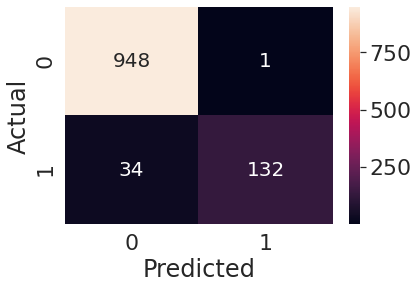

In [49]:
data = {'y_Actual': y_test,
        'y_Predicted': pred_5
        }

df_confusion_max = pd.DataFrame(data, columns=['y_Actual', 'y_Predicted'])
confusion_matrix = pd.crosstab(df_confusion_max['y_Actual'], df_confusion_max['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True, fmt='d',annot_kws={"fontsize":20})       # fmt='.2%'     fmt="d"
# sns.set(font_scale=3)
plt.show()

In [50]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

y_true = np.reshape(y_test, [1115])
y_pred = np.reshape(pred_5, [1115])

# Confusion Matrix
print('Confusion Matrix', confusion_matrix(y_true, y_pred))
TN, FP, FN, TP = confusion_matrix(y_true, y_pred).ravel()
print(TN, FP, FN, TP)
print("=======================================")
# Accuracy
print('Accuracy:', accuracy_score(y_true, y_pred))
print("=======================================")
# Recall
print('Recall:', recall_score(y_true, y_pred, average=None))
print("=======================================")
# Precision
print('Precision', precision_score(y_true, y_pred, average=None))
print("=======================================")
# F1 Score
print('F1 Score:', f1_score(y_true, y_pred, average=None))
print("=======================================")
# classification report
print(classification_report(y_true, y_pred, target_names=['0', '1']))


# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print("Sensitivity=",TPR)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
print("Specificity",TNR)
# Precision or positive predictive value
PPV = TP/(TP+FP)
print("Precision or positive predictive value=",PPV)
# Negative predictive value
NPV = TN/(TN+FN)
print("Negative predictive value=",NPV)
# Fall out or false positive rate
FPR = FP/(FP+TN)
print("Fall out or false positive rate",FPR)
# False negative rate
FNR = FN/(TP+FN)
print("False negative rate",FNR)
# False discovery rate
FDR = FP/(TP+FP)
print("False discovery rate",FDR)

Confusion Matrix [[948   1]
 [ 34 132]]
948 1 34 132
Accuracy: 0.968609865470852
Recall: [0.99894626 0.79518072]
Precision [0.96537678 0.9924812 ]
F1 Score: [0.98187468 0.88294314]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       949
           1       0.99      0.80      0.88       166

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.93      1115
weighted avg       0.97      0.97      0.97      1115

Sensitivity= 0.7951807228915663
Specificity 0.9989462592202318
Precision or positive predictive value= 0.9924812030075187
Negative predictive value= 0.9653767820773931
Fall out or false positive rate 0.001053740779768177
False negative rate 0.20481927710843373
False discovery rate 0.007518796992481203
